In [15]:
# analysis on-hold
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import seaborn as sns

In [16]:
import sys
sys.path.append('/Users/dbao/Downloads/research/rc_scripts/analysis')

from final_analysis.process_helper.df_choice_add_features import df_choice_add_features
from final_analysis.process_helper.df_do_redo_pair import df_do_redo_pair
import final_analysis.plot_helper.format
save_mode = ".pdf"
font_size = 16


In [17]:
%load_ext rpy2.ipython

from rpy2.robjects.packages import importr
# import R's "base" package
lme4 = importr('lme4')
mass = importr('MASS')
rcompanion = importr('rcompanion')

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


# load data

In [18]:
home_dir = '/Users/dbao/Library/CloudStorage/GoogleDrive-sherrydbao@gmail.com/.shortcut-targets-by-id/1sYZNVBbYCrHcHjo-9xdKcA4wLnob9ZEq/'+'/road_construction/data/2022_online/'
data_dir = home_dir + 'R_analysis_data/'
out_dir = home_dir + 'figures/figures_final/'
out_dir2 = home_dir + 'stat_model/final/'

In [19]:
data_choice_level = pd.read_csv(data_dir +  'choice_level/choicelevel_data.csv') # first column is index  
data_choice_level = data_choice_level.rename(columns={'Unnamed: 0':'index_copy'})
data_choice_level = df_choice_add_features(data_choice_level)
sc_data_choice_level = data_choice_level[data_choice_level['condition']==1].reset_index(drop=True) 

# process data

In [20]:
condition = f"(lastUndo == 1)"
df = df_do_redo_pair(sc_data_choice_level, condition)

In [21]:
# combine error_do_seq and error_redo_seq into a new dataframe as 1 column
new_df = pd.DataFrame()
new_df['error_seq'] = pd.concat([df['error_do_seq'], df['error_redo_seq']], ignore_index=True)
new_df['error_move'] = pd.concat([df['error_do_move'], df['error_redo_move']], ignore_index=True)
new_df['subject'] = pd.concat([df['subjects'], df['subjects']], ignore_index=True)
new_df['puzzleID'] = pd.concat([df['puzzleID'], df['puzzleID']], ignore_index=True)
new_df['do_redo'] = pd.concat([pd.Series(['do']*len(df)), pd.Series(['redo']*len(df))], ignore_index=True)

# save new_df
new_df.to_csv(data_dir + 'do_redo_comparison.csv', index=False)

# cumulative error

## sequence

In [22]:
mean_do = df.groupby(['subjects','puzzleID'])['error_do_seq'].mean().groupby('subjects').mean().mean()
mean_redo = df.groupby(['subjects','puzzleID'])['error_redo_seq'].mean().groupby('subjects').mean().mean()
sem_do = df.groupby(['subjects','puzzleID'])['error_do_seq'].mean().groupby('subjects').mean().sem()
sem_redo = df.groupby(['subjects','puzzleID'])['error_redo_seq'].mean().groupby('subjects').mean().sem()
print(mean_do, mean_redo, sem_do, sem_redo)


1.3028356732038677 0.7484330369969484 0.05547249572110734 0.03580188080168856


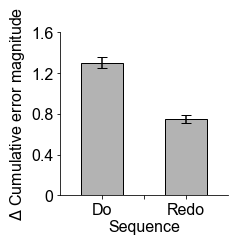

In [23]:
%matplotlib inline

plt.rcParams.update({'font.size': font_size})
fig, ax = plt.subplots(1,1,figsize=(3,3))
sns.despine()

ax.bar([0,1], [mean_do, mean_redo], yerr=[sem_do, sem_redo], color=[.7,.7,.7], edgecolor='k', capsize=5, width=0.5)

# ylabel
ax.set_ylabel('$\Delta$ Cumulative error magnitude')
# set yticks

ax.set_xlim([-0.5, 1.5])
ax.set_ylim([0, 1.5])
ax.set_yticks([0, 0.4, 0.8, 1.2, 1.6])
ax.set_yticklabels(['0' ,'0.4', '0.8', '1.2', '1.6'])

# xtickslabel
ax.set_xticks([0,0.5, 1])
ax.set_xticklabels(['Do', '\nSequence', 'Redo'])

# save figure
fig.savefig(out_dir + 'error_rate_do_redo_seq'+save_mode, transparent=True,
            bbox_inches='tight', pad_inches=0.1)

## move

In [24]:
mean_do = df.groupby(['subjects','puzzleID'])['error_do_move'].mean().groupby('subjects').mean().mean()
mean_redo = df.groupby(['subjects','puzzleID'])['error_redo_move'].mean().groupby('subjects').mean().mean()
sem_do = df.groupby(['subjects','puzzleID'])['error_do_move'].mean().groupby('subjects').mean().sem()
sem_redo = df.groupby(['subjects','puzzleID'])['error_redo_move'].mean().groupby('subjects').mean().sem()


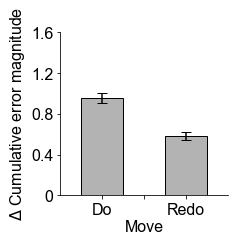

In [25]:
%matplotlib inline

plt.rcParams.update({'font.size': font_size})
fig, ax = plt.subplots(1,1,figsize=(3,3))
sns.despine()

ax.bar([0,1], [mean_do, mean_redo], yerr=[sem_do, sem_redo], color=[.7,.7,.7], edgecolor='k', capsize=5, width=0.5)

# ylabel
ax.set_ylabel('$\Delta$ Cumulative error magnitude')
# set yticks

ax.set_xlim([-0.5, 1.5])
ax.set_ylim([0, 1.5])
ax.set_yticks([0, 0.4, 0.8, 1.2, 1.6])
ax.set_yticklabels(['0' ,'0.4', '0.8', '1.2', '1.6'])

# xtickslabel
ax.set_xticks([0,0.5, 1])
ax.set_xticklabels(['Do', '\nMove', 'Redo'])

# save figure
fig.savefig(out_dir + 'error_rate_do_redo_move'+save_mode, transparent=True,
            bbox_inches='tight', pad_inches=0.1)

# proportion

In [26]:
df_p = df.groupby(['category','subjects']).size().unstack(fill_value=0).apply(lambda x: x/x.sum())
df_p = df_p.T
df_p

print(df_p.mean(), df_p.sem())

category
0.0    0.118655
1.0    0.324409
2.0    0.389201
3.0    0.167734
dtype: float64 category
0.0    0.015293
1.0    0.022071
2.0    0.023974
3.0    0.015152
dtype: float64


In [27]:
np.arange(2)*3

array([0, 3])

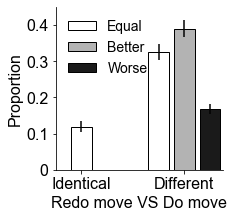

In [28]:
%matplotlib inline

plt.rcParams.update({'font.size': font_size})
fig, ax = plt.subplots(1,1,figsize=(3,3))
colors = ['1','1', '0.7','0.1']

ax.bar([1,4,5,6], 
        np.mean(df_p,axis=0), 
        yerr = np.std(df_p,axis=0)/np.sqrt(df_p.shape[0]), 
        color = colors,edgecolor = 'k')

sns.despine()

ax.set_xlim([0,6.5])
ax.set_xticks([1,5])
ax.set_xticklabels(['Identical','Different'])

# set y lim
ax.set_ylim([0,0.45])
# set y ticks
ax.set_yticks(np.arange(0,0.5,0.1))
ax.set_yticklabels(['0','0.1','0.2','0.3','0.4'])

legend_elements = [Patch(facecolor='1', edgecolor='k', label='Equal'),    
                   Patch(facecolor='0.7', edgecolor='k', label='Better'),    
                   Patch(facecolor='0.1', edgecolor='k', label='Worse')]
ax.legend(handles=legend_elements, loc='upper left', frameon=False, fontsize = 14)

ax.set_xlabel('Redo move VS Do move')
ax.set_ylabel('Proportion')

# save figure
plt.savefig(out_dir + '/figure_worse_better_with_same_diff'+save_mode, dpi=300, bbox_inches='tight')